<a href="https://colab.research.google.com/github/Erlang-929/ML/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/ kaggle.json

In [ ]:
!kaggle datasets list

ref                                                               title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
anandshaw2001/netflix-movies-and-tv-shows                         Netflix Movies and TV Shows                          1MB  2025-01-03 10:33:01           9824        264  1.0              
oktayrdeki/traffic-accidents                                      Traffic Accidents                                    5MB  2025-01-20 10:33:44           1952         44  1.0              
ankushpanday1/global-road-accidents-dataset                       Global Road Accidents Dataset                       12MB  2025-01-25 04:22:29           1154         36  1.0              
ashaychoudhary/anxiety-attack-factors-symptoms-and-seve

In [ ]:
!kaggle datasets download -d 'anandshaw2001/netflix-movies-and-tv-shows'

Dataset URL: https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows
License(s): CC0-1.0
 75% 1.00M/1.34M [00:00<00:00, 1.29MB/s]
100% 1.34M/1.34M [00:00<00:00, 1.61MB/s]


In [ ]:
!unzip netflix-movies-and-tv-shows.zip

Archive:  netflix-movies-and-tv-shows.zip
  inflating: netflix_titles.csv      


In [ ]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv')
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


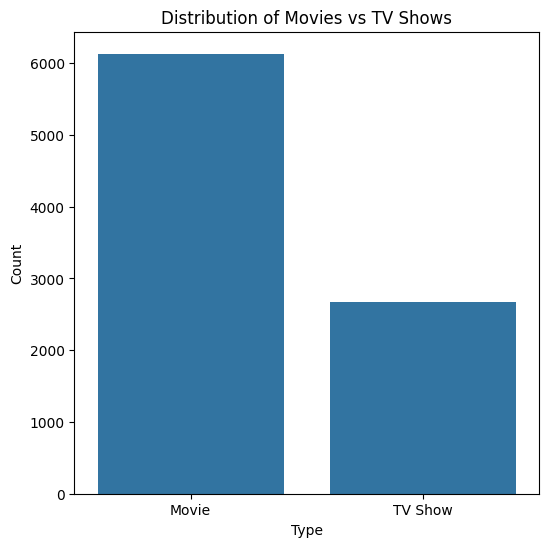

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of Movies and TV Shows
type_counts = df['type'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#Hasil Insight : Di bawah ini merupakan data distribusi film dan tv series di Netflix sampai tahun 2021, dapat dilihat bahwa distribusi film mencapai lebih dari 6000 jauh melampaui tv show


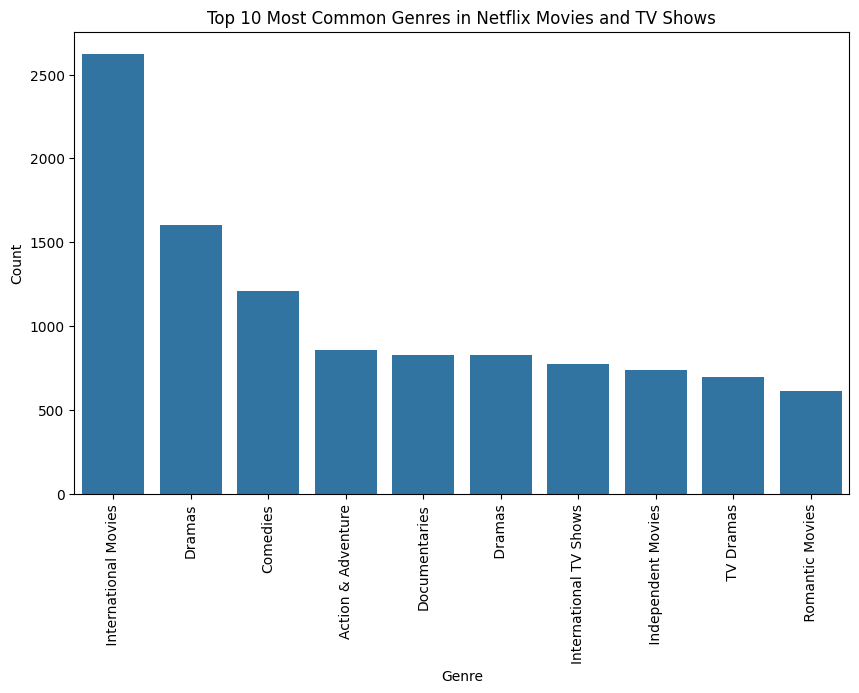

In [ ]:
# Get the most common genres from the 'listed_in' column
genre_counts = df['listed_in'].str.split(',').explode().value_counts().head(10)

# Plot the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Top 10 Most Common Genres in Netflix Movies and TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#Hasil Insight: Dari data di bawah genre yang paling banyak adalah international movies, karena banyaknya distribusi dari berbagai negara, menunjukan daya tarik pasar global terhadap Netflix. Diikuti dengan genre drama dan komedi yang berarti memilki potensi audiens yang besar


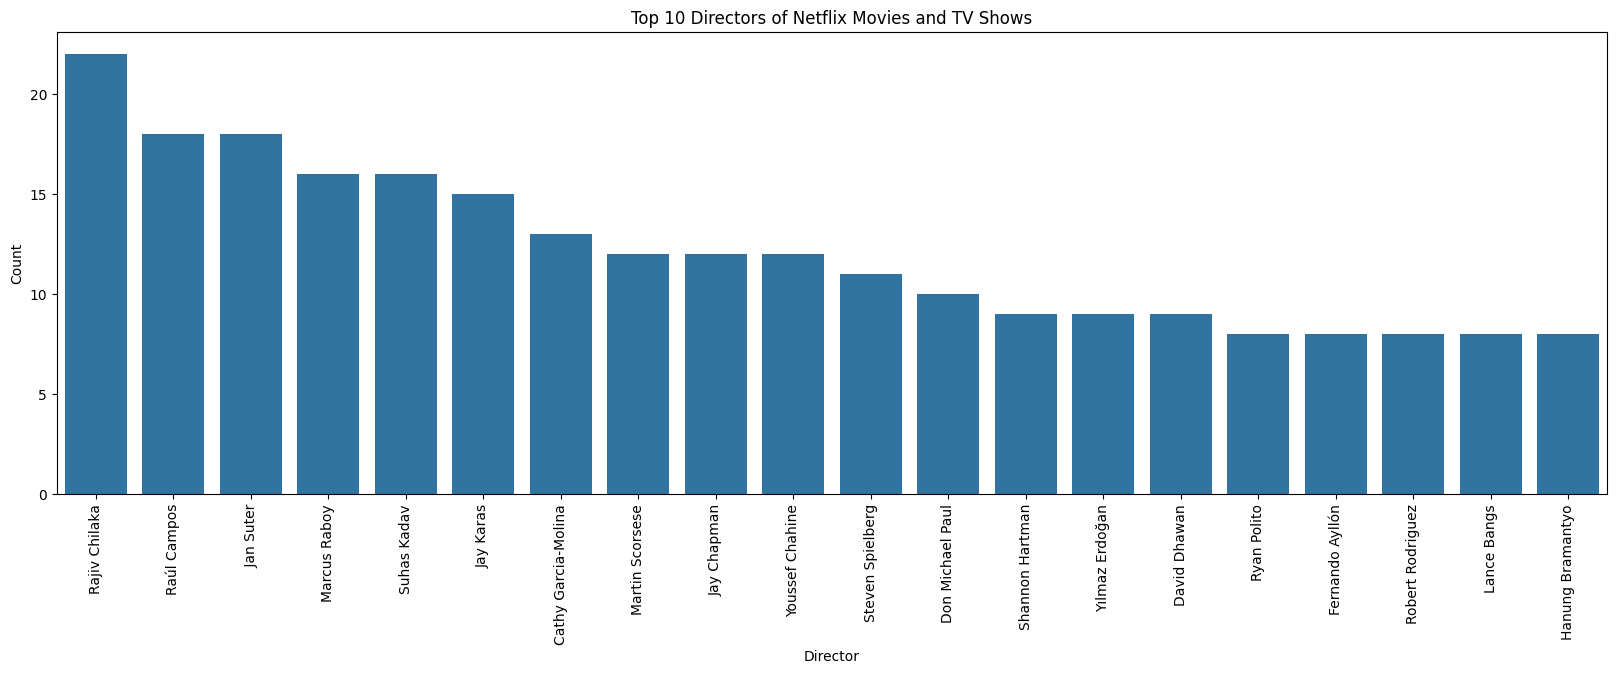

In [ ]:
# Top 10 directors
top_directors = df['director'].dropna().str.split(',').explode().value_counts().head(20)

# Plot for directors
plt.figure(figsize=(20, 6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title('Top 10 Directors of Netflix Movies and TV Shows')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#Hasil Insight: Di bawah ini menunjukan sutradara yang paling banyak berkontribusi & berkontrubusi pada platform Netflix, kita dapat melihat pengaruh sutradara terhadap kesusksesan konten

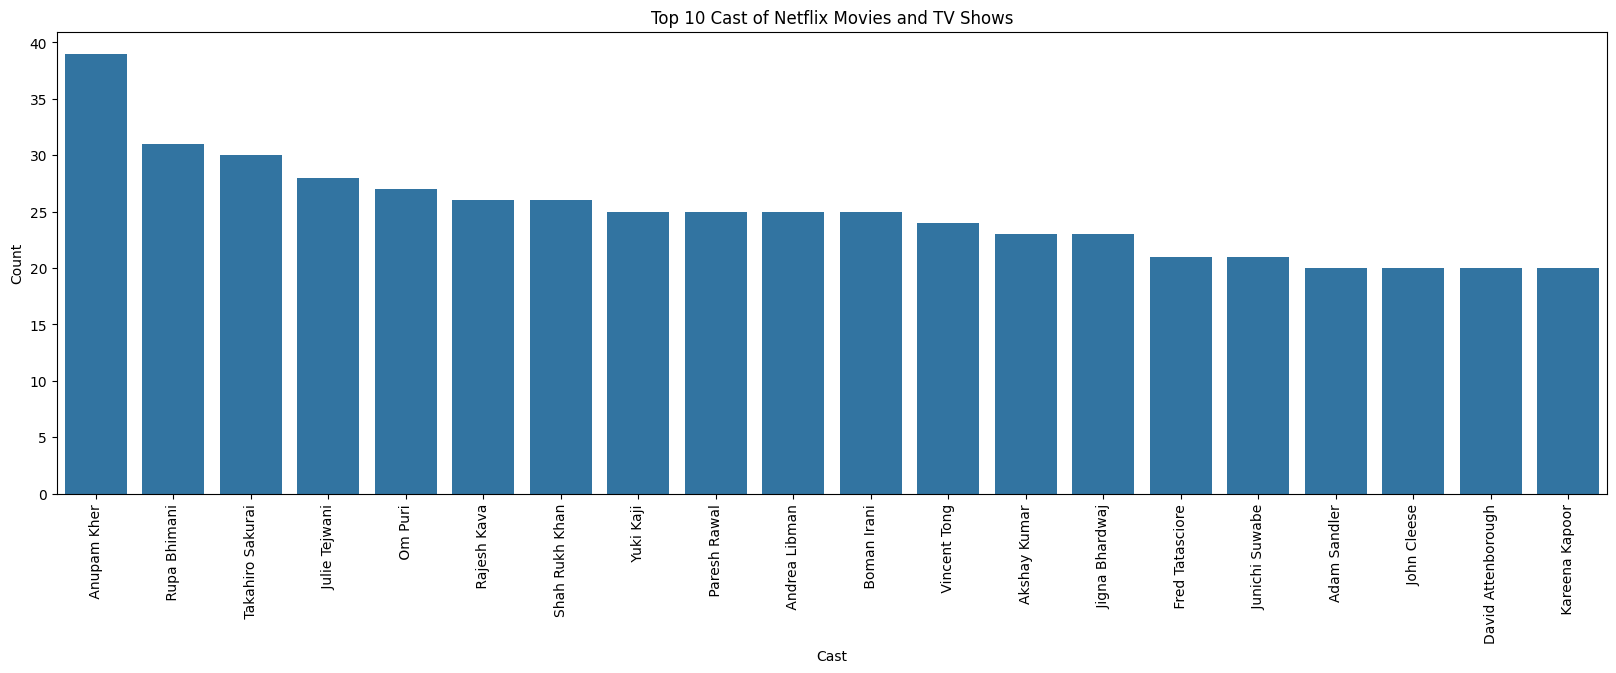

In [ ]:
# Get the top 10 cast
top_cast = df['cast'].dropna().str.split(',').explode().value_counts().head(20)

# Plot for cast
plt.figure(figsize=(20, 6))
sns.barplot(x=top_cast.index, y=top_cast.values)
plt.title('Top 10 Cast of Netflix Movies and TV Shows')
plt.xlabel('Cast')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#Hasil Insight: Di bawah ini menampilkan urutan aktor yang paling banyak muncul di film/tv series yang ada di Netflix.

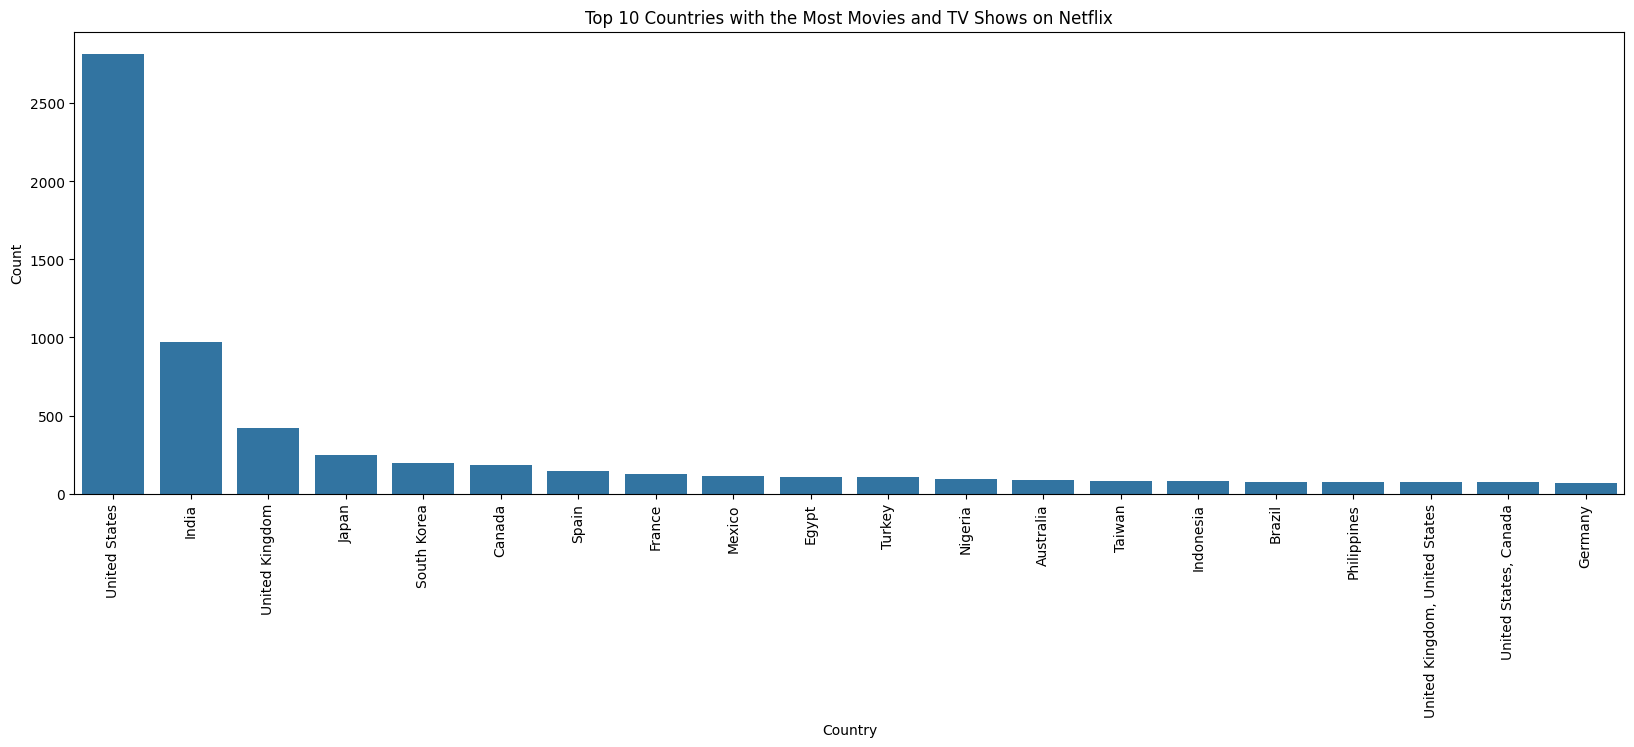

In [ ]:
# Count the number of Movies/TV Shows from each country
country_counts = df['country'].value_counts().head(20)

# Plot
plt.figure(figsize=(20, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries with the Most Movies and TV Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#Hasil Insight: Amerika mendominasi pasar perfileman & tv series di Netflix, dilanjutkan dengan India, Inggris, Jepang dan Korea Selatan. Hal ini mencerminkan pengaruh yang besar negara-negara tersebut dan dapat menjadi strategi Netflix kedepannya.

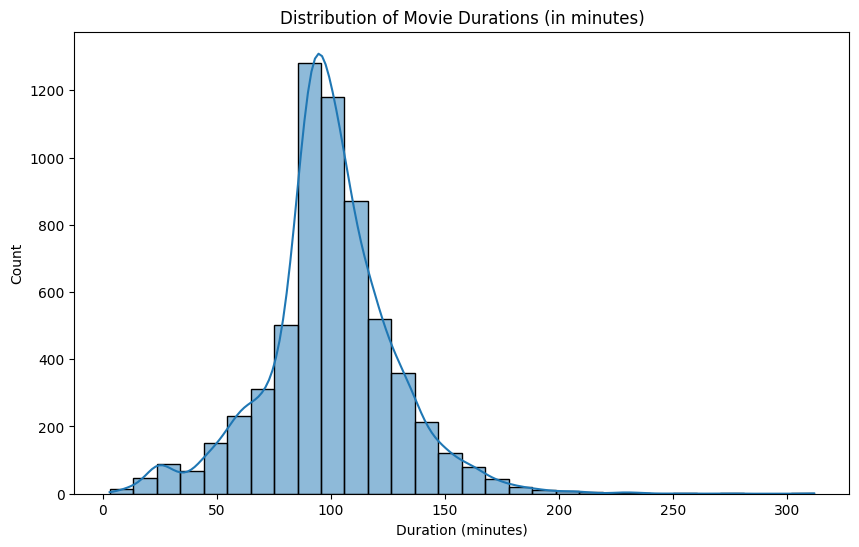

<ipython-input-36-dcc27e6e7206>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(float)


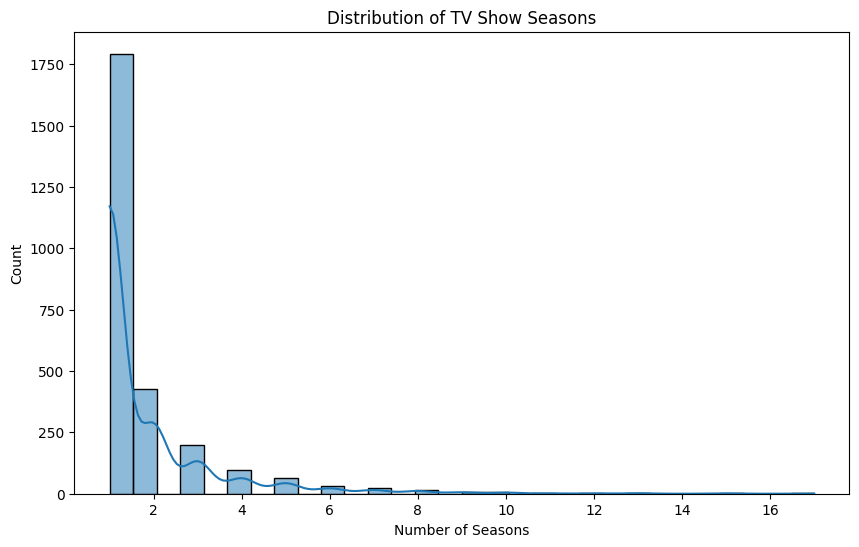

In [ ]:
# Extract numeric duration for movies
df['duration_minutes'] = df['duration'].str.extract('(\d+)').astype(float)

# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Plot for movies durations
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration_minutes'], kde=True, bins=30)
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# For TV shows, count the number of seasons
tv_shows_df['seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(float)

# Plot for TV shows seasons
plt.figure(figsize=(10, 6))
sns.histplot(tv_shows_df['seasons'], kde=True, bins=30)
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

#Hasil Insigth 1: Film dengan durasi range mendekati 100 menit cenderung lebih banyak dan juga diminati, hal ini menunjukan rentang waktu tersebut ideal dalam film
#Hasil Insight 2: TV Series yang memiliki 1 hingga 3 season cenderung lebih banyak, hal ini bisa jadi karena tv series masih on-going ataupun dihentikan, faktor-faktornya seperti penurunan rating, biaya produksi, plot cerita, dan lain sebagainya. Namun hal ini dapat menjadi jumlah total season yang ideal untuk standar Netflix


<ipython-input-44-df5fc1e3a339>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_trend = df.groupby(['release_year', 'rating']).size().unstack(fill_value=0)


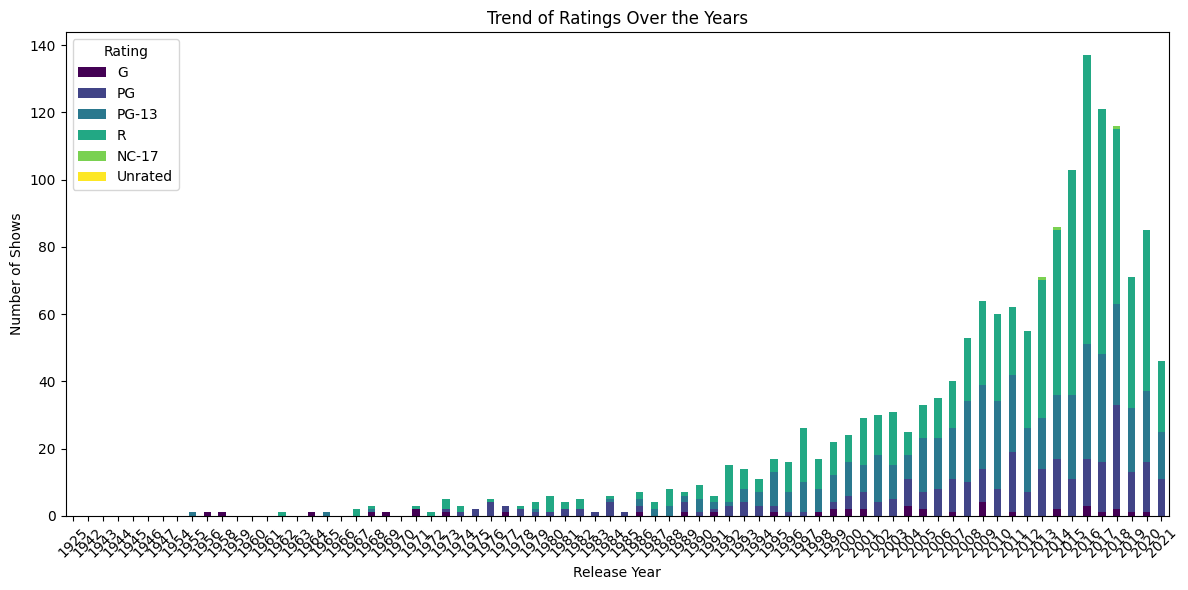

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('netflix_titles.csv')



# Clean the data:
df['release_year'] = df['release_year'].astype(int)
df = df.dropna(subset=['rating'])

# Convert ratings to a categorical type for better analysis
# Adjust the categories based on your dataset
rating_order = ['G', 'PG', 'PG-13', 'R', 'NC-17', 'Unrated']
df['rating'] = pd.Categorical(df['rating'], categories=rating_order, ordered=True)

# Group by release year and rating, and count the number of shows for each rating
rating_trend = df.groupby(['release_year', 'rating']).size().unstack(fill_value=0)

# Plotting the trend
plt.figure(figsize=(12, 6))
rating_trend.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Trend of Ratings Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.legend(title='Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Hasil Insight: Di bawah ini adalah grafik rating berdasarkan jumlah film & tv show tiap tahun perilisannya. Dari sini kita bisa melihat tren rating yang terus berubah-ubah yang bisa dipengaruhi oleh regulasi sensor di berbagai negara. Dari data ini kita juga bisa meninjau preferensi penonton tiap tahunnya
